
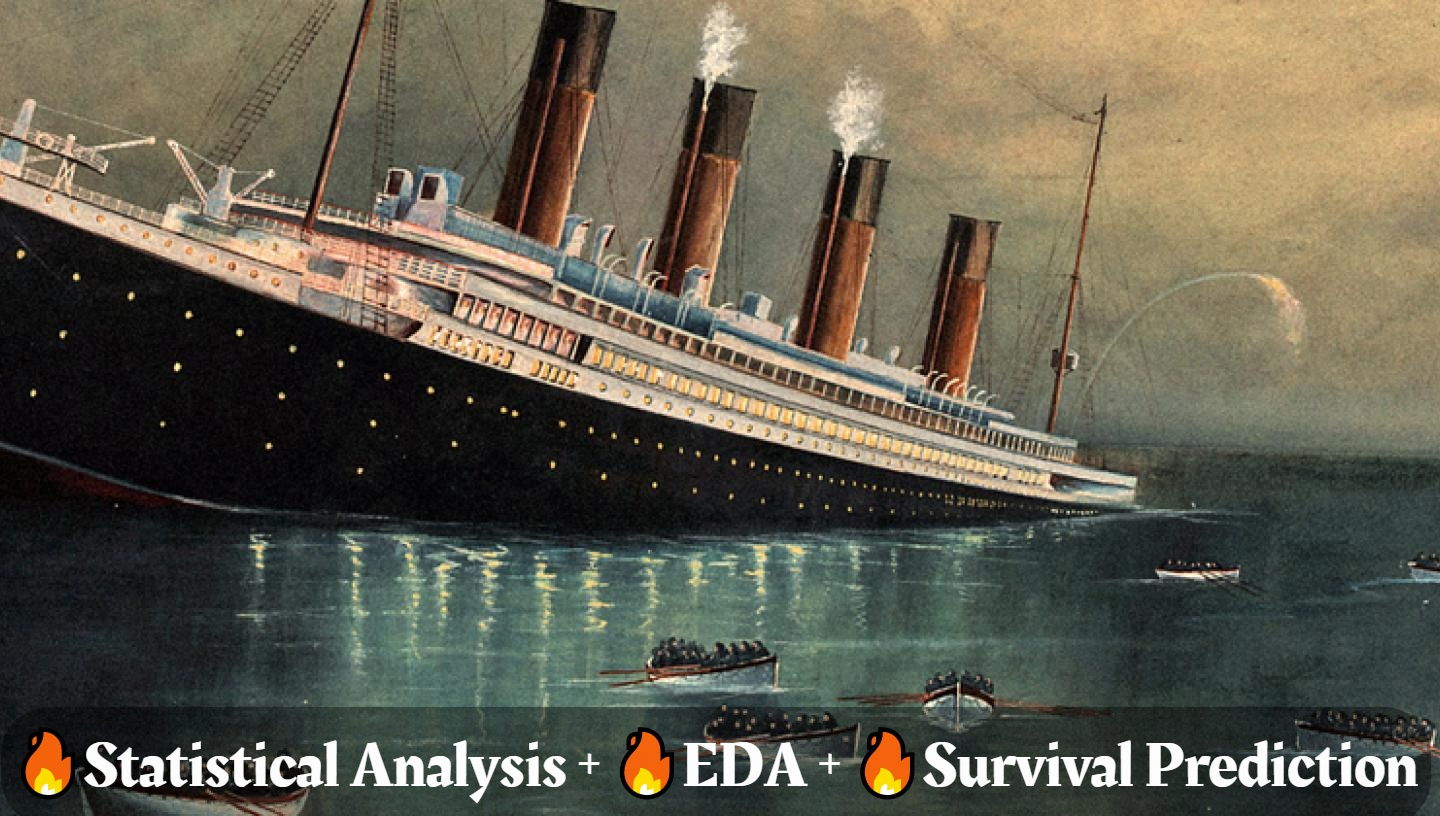


<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;"><br>In this project, I will be performing Statistical analysis and Auto EDA on titanic dataset.<br>
    Also i am creating a model which will help us to predict the <b>" What sorts of people were more likely to survive? "</b> using passenger data. As target variable is discrete values, here i will be creating the classification model.<br><br>
</p>

<h2 style="color:#008066;font-size:38px;font-family:Lucida Handwriting;text-align:center;">⚓️<strong><u><b>Introduction</b></u></strong>⚓️</h2>
<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;"><br>This is one of the popular Kaggle competition.<br>
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of <b>1502</b> out of <b>2224</b> passengers and crew.<br>
While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.<br>
</p>


<h2 style="color:#008066;font-size:38px;font-family:Lucida Handwriting;text-align:center;">⚓️<strong><u><b>About The Dataset</b></u></strong>⚓️</h2>


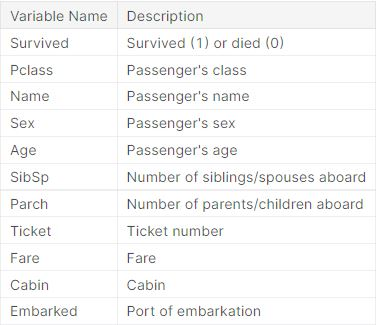

<h2 style="color:#008066;font-size:38px;font-family:Lucida Handwriting;text-align:center;">⚓️<strong><u><b>Workflow Stages</b></u></strong>⚓️</h2>

* [Importing The Libraries](#1)
* [Loading & Reading The Dataset](#2)
* [Meta Information Of The Dataset](#3)
* [Finding The Uniques Values In Each Colummn](#4)
* [Find & Impute The Missing Values](#5)
* [Droping The Redundant Features](#6)
* [Finding The Duplicate Records](#7)
* [Basics Statistics On Numerical And Categorical Features](#8)
* [Statistics Analysis On Each Features](#9)
* [Auto Exploratory Data Analysis](#10)
* [Feature Generation & Feature Transformation](#11)
* [Checking The Correlation b/w The Features](#12)
* [Balancing The Dataset](#13)
* [Model Creation](#14)
* [Hyper Parameter Tunning](#15)
* [Building The Best Model](#16)
* [Model Evaluation](#17)
* [Finding The Best Features](#18)

In [ ]:
from IPython.core.display import display, HTML, Javascript

# ----- Notebook Theme -----#1e77b3
color_map = ['#f7df00', '#ffe81a', '#ffed4d','#fff066', '#fff599','#fff7b3']

prompt = color_map[-1]
main_color = color_map[0]
strong_main_color = color_map[1]
custom_colors = [strong_main_color, main_color]

css_file = ''' 

div #notebook {
background-color: white;
line-height: 20px;
}

#notebook-container {
%s
margin-top: 2em;
padding-top: 2em;
border-top: 4px solid %s; /* light orange */
-webkit-box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5); /* pink */
    box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5); /* pink */
}

div .input {
margin-bottom: 1em;
}

.rendered_html h1, .rendered_html h2, .rendered_html h3, .rendered_html h4, .rendered_html h5, .rendered_html h6 {
color: %s; /* light orange */
font-weight: 600;
}

div.input_area {
border: none;
    background-color: %s; /* rgba(229, 143, 101, 0.1); light orange [exactly #E58F65] */
    border-top: 2px solid %s; /* light orange */
}

div.input_prompt {
color: %s; /* light blue */
}

div.output_prompt {
color: %s; /* strong orange */
}

div.cell.selected:before, div.cell.selected.jupyter-soft-selected:before {
background: %s; /* light orange */
}

div.cell.selected, div.cell.selected.jupyter-soft-selected {
    border-color: %s; /* light orange */
}

.edit_mode div.cell.selected:before {
background: %s; /* light orange */
}

.edit_mode div.cell.selected {
border-color: %s; /* light orange */

}
'''
def to_rgb(h): 
    return tuple(int(h[i:i+2], 16) for i in [0, 2, 4])

main_color_rgba = 'rgba(%s, %s, %s, 0.1)' % (to_rgb(main_color[1:]))
open('notebook.css', 'w').write(css_file % ('width: 95%;', main_color, main_color, main_color_rgba, main_color,  main_color, prompt, main_color, main_color, main_color, main_color))

def nb(): 
    return HTML("<style>" + open("notebook.css", "r").read() + "</style>")
nb()


<a id="1"></a>
<h3 style="color:#008066;font-size:28px;font-family:Lucida Handwriting;text-align:center;"><strong><u><b>1. Import The Libraries</b></u></strong></h3>


In [ ]:
#IMPORT THE LIBRARIES....
import numpy as np # linear algebra....
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)....
from matplotlib import pyplot as plt #Visualization of the data....
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

#Libraries to visualize the dataset
import matplotlib as mpl
import plotly.graph_objs as go
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot

#Libraries to AutoEDA
import pandas_profiling as pp

#Useful machine learning libraries....
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve ,KFold
from sklearn.metrics import roc_curve,accuracy_score,f1_score,auc,confusion_matrix,roc_auc_score,plot_confusion_matrix
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

<a id="2"></a>
<h3 style="color:#008066;font-size:28px;font-family:Lucida Handwriting;text-align:center;"><strong><u><b>2. Loading & Reading The Dataset</b></u></strong></h3>

In [ ]:
df=pd.read_csv("/kaggle/input/titanic/train.csv")
df.head().style.background_gradient(cmap='summer')

In [ ]:
#Its always better to have a copy of you dataset.....
df1=df.copy()

<a id="3"></a>
<h3 style="color:#008066;font-size:28px;font-family:Lucida Handwriting;text-align:center;"><strong><u><b>3. Meta Information Of The Dataset</b></u></strong></h3>

In [ ]:
#The shape of the dataset.....
df.shape

In [ ]:
# list of numerical variables............
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('-'*100)
print('Numerical Variables Column: ',numerical_features)

In [ ]:
# list of categorical variables............
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Number of categorical variables: ', len(cat_features))
print('-'*80)
print('Categorical variables column name:',cat_features)

In [ ]:
#The dimensions of the dataset.......
df.ndim

In [ ]:
#index of the dataset
df.index

In [ ]:
#The size of the dataset.......
df.size

In [ ]:
def memory_use():
    print('\033[1m'+'Memory used by all colomns in bytes'+'\033[0m')

In [ ]:
k = df.memory_usage()
print(k,'bytes'+'\n')

In [ ]:
#The Information of the Dataset
df.info()

<a id="4"></a>
<h3 style="color:#008066;font-size:28px;font-family:Lucida Handwriting;text-align:center;"><strong><u><b>4. Finding The Unique Values In Each Column</b></u></strong></h3>

In [ ]:
from IPython.core.display import HTML
def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>')

In [ ]:
df_nunique = {var: pd.DataFrame(df[var].value_counts()) 
              for var in {'Survived', 'Pclass', 'Sex','SibSp','Parch','Embarked'}}
multi_table([df_nunique['Survived'].style.background_gradient(cmap='summer'),df_nunique['SibSp'].style.background_gradient(cmap='summer'),df_nunique['Parch'].style.background_gradient(cmap='summer'),df_nunique['Embarked'].style.background_gradient(cmap='summer')])

<a id="5"></a>
<h3 style="color:#008066;font-size:28px;font-family:Lucida Handwriting;text-align:center;"><strong><u><b>5. Find & Impute The Missing Values</b></u></strong></h3>

In [ ]:
#Visualizing the missing values
import missingno as mn
mn.matrix(df,color=(0,0,0),figsize = (10,4))

In [ ]:
#PERCENTAGE OF THE MISSING VALUES - DataFrame..... 
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    Percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, Percentage], axis=1, keys=['Total', 'Percentage'])
missing_data(df)[missing_data(df)["Percentage"]!=0].style.background_gradient(cmap='summer')

<h3 style="color:#008066;font-size:18px;font-family:Lucida Handwriting;text-align:left;">📝<b>Notable Points:-</b></h3>
<p style="color:#008066;font-size:16px;font-family:Georgia;text-align:left;">
1. We can see that <b>"Cabin"</b> feature has more than 40% of missing values.Hence i am deleting this feature.<br>
2. Now,<b>"Age"</b> and <b>"Embarked"</b> feature has very less missing values.<br>
3. <b>"Age"</b> is a numerical feature and it has some outliers so using median technique to fill the nan values.<br>
4. <b>"Embarked"</b> is a categorical feature and here i am using mode technique to fill the nan values.
</p>

In [ ]:
#FILL THE MISSING VALUES WITH THE MEAN & MODE VALUES.. 
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Age']=df['Age'].fillna(df['Age'].median())

<a id="6"></a>
<h3 style="color:#008066;font-size:28px;font-family:Lucida Handwriting;text-align:center;"><strong><u><b>6. Dropping The Redundant Features</b></u></strong></h3>

In [ ]:
df.drop(columns = ['Cabin','PassengerId'],axis = 1,inplace = True)

<a id="7"></a>
<h3 style="color:#008066;font-size:28px;font-family:Lucida Handwriting;text-align:center;"><strong><u><b>7. Finding The Duplicate Records</b></u></strong></h3>

In [ ]:
#Finding the duplicates from dataset...
df[df.duplicated()]

<a id="8"></a>
<h3 style="color:#008066;font-size:28px;font-family:Lucida Handwriting;text-align:center;"><strong><u><b>8. Basics Statistics On Numerical And Categorical Features</b></u></strong></h3>

In [ ]:
# Statistics on Numerical data......
round(df.describe(exclude = 'object'), 2).T.style.background_gradient(cmap='summer')

<h3 style="color:#008066;font-size:18px;font-family:Lucida Handwriting;text-align:Left;">📝<b>Notable Points:-</b></h3>
<p style="color:#008066;font-size:16px;font-family:Georgia;text-align:left;">
1. Ages range from 0.4 to 80.<br>
2. Survived has only two values {0,1}.<br>
3. Fare ranges from 0 to 514.<br>
4. Parch has values -{0,1,2,3,4,5,6}.<br>
5. SibSp has values -{0,1,2,3,4,5,6,7,8}.<br>
6. Pclass has values -{1,2,3}.<br>
</p>

In [ ]:
# Statistics on Categorical data
round(df.describe(exclude = ['float', 'int64']),2).T.style.set_properties(**{"background-color": "#b3e6c9","color": "black", "border-color": "black","font-size":"10pt",'width': 130})

<h3 style="color:#008066;font-size:18px;font-family:Lucida Handwriting;text-align:Left;">📝<b>Notable Points:-</b></h3>
<p style="color:#008066;font-size:16px;font-family:Georgia;text-align:left;">
1. Names are unique across the dataset (count=unique=891).<br>
2. Sex variable as two possible values with 65% male (top=male, freq=577/count=891).<br>
3. Embarked takes three possible values. S port used by most passengers (top=S).<br>
4. Ticket feature has high ratio (22%) of duplicate values (unique=681).<br>
</p>

<a id="9"></a>
<h3 style="color:#008066;font-size:28px;font-family:Lucida Handwriting;text-align:center;"><strong><u><b>9. Statistics Analysis On Each Features</b></u></strong></h3>
<h3 style="color:#008066;font-size:18px;font-family:Lucida Handwriting;text-align:left;"><strong><b>9.1 Sex Features:-</b></strong></h3>

In [ ]:
colors = px.colors.sequential.Bluyl
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
a=fig.add_trace(go.Bar(y = df['Sex'].value_counts().values.tolist(), 
                      x = df['Sex'].value_counts().index, 
                      text=df['Sex'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

b=fig.add_trace((go.Pie(labels=df['Sex'].value_counts().keys(),
                             values=df['Sex'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors,
                            line_color = 'black',
                            line_width=3),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
#Changing plot & figure background 
fig.update_layout(
                    paper_bgcolor= '#ffffff',
                    plot_bgcolor= '#ffffff',
                    title=dict(text = "Distribution Of The Gender",x=0.5,y=0.95),
                    title_font_size=28,font_family="Lucida Handwriting"
                  )

In [ ]:
df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False).style.background_gradient(cmap='summer')

In [ ]:
fig = px.histogram(df, x="Sex", color ="Survived", pattern_shape="Survived",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f7feae",
                1: "#b7e6a5"})
fig.update_layout(bargap=0.2 ,paper_bgcolor= '#ffffff',
                    plot_bgcolor= '#ffffff',
                    title=dict(text = "Analyse - Sex & Survived",x=0.5,y=0.95),
                    title_font_size=28,font_family="Lucida Handwriting")

<h3 style="color:#008066;font-size:18px;font-family:Lucida Handwriting;text-align:left;">📝<b>Notable Points:-</b></h3>
<p style="color:#008066;font-size:16px;font-family:Georgia;text-align:left;">
1. The distribution chart confirms that we have a higher no. of <b>"Males"</b> than <b>"Females"</b> in the data.<br>
2. After analyzing - Sex & Survived confirms <b>"Females"</b> are more likely to survive than <b>"Males"</b>.<br>
</p>

<h3 style="color:#008066;font-size:18px;font-family:Lucida Handwriting;text-align:left;"><strong><b>9.2 Passenger's Class Features:-</b></strong></h3>

In [ ]:
colors = px.colors.sequential.Bluyl
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
a=fig.add_trace(go.Bar(y = df['Pclass'].value_counts().values.tolist(), 
                      x = df['Pclass'].value_counts().index, 
                      text=df['Pclass'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

b=fig.add_trace((go.Pie(labels=df['Pclass'].value_counts().keys(),
                             values=df['Pclass'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors,
                            line_color = 'black',
                            line_width=3),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
#Changing plot & figure background 
fig.update_layout(
                    paper_bgcolor= '#ffffff',
                    plot_bgcolor= '#ffffff',
                    title=dict(text = "Distribution Of The Passenger's class",x=0.5,y=0.95),
                    title_font_size=28,font_family="Lucida Handwriting"
                  )

In [ ]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False).style.background_gradient(cmap='summer')

In [ ]:
fig = px.histogram(df, x="Pclass", color ="Survived", pattern_shape="Survived",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f7feae",
                1: "#b7e6a5"})
fig.update_layout(bargap=0.2 ,paper_bgcolor= '#ffffff',
                    plot_bgcolor= '#ffffff',
                    title=dict(text = "Analyse - Pclass & Survived",x=0.5,y=0.95),
                    title_font_size=28,font_family="Lucida Handwriting")

<h3 style="color:#008066;font-size:18px;font-family:Lucida Handwriting;text-align:left;">📝<b>Notable Points:-</b></h3>
<p style="color:#008066;font-size:16px;font-family:Georgia;text-align:left;">
1. The distribution chart confirms that we have a higher no. of <b>"3rd" class</b> than <b>"1st" & "2th"</b>class in the data.<br>
2. The chart confirms that <b>"1st"</b> class are more likely survivied than other classes.<br>
3. The chart confirms that <b>"3rd"</b> class are more likely dead than other classes.<br>
</p>

<h3 style="color:#008066;font-size:18px;font-family:Lucida Handwriting;text-align:left;"><strong><b>9.3 Survived Features:-</b></strong></h3>

In [ ]:
colors = px.colors.sequential.Bluyl
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
a=fig.add_trace(go.Bar(y = df['Survived'].value_counts().values.tolist(), 
                      x = df['Survived'].value_counts().index, 
                      text=df['Survived'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

b=fig.add_trace((go.Pie(labels=df['Survived'].value_counts().keys(),
                             values=df['Survived'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors,
                            line_color = 'black',
                            line_width=3),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
#Changing plot & figure background 
fig.update_layout(
                    paper_bgcolor= '#ffffff',
                    plot_bgcolor= '#ffffff',
                    title=dict(text = "Distribution Of The Survived",x=0.5,y=0.95),
                    title_font_size=28,font_family="Lucida Handwriting"
                  )

<h3 style="color:#008066;font-size:18px;font-family:Lucida Handwriting;text-align:left;">📝<b>Notable Points:-</b></h3>
<p style="color:#008066;font-size:16px;font-family:Georgia;text-align:left;">
Data is not balanced.We need to balance it,using undersampling or over sampling techniques.
</p>

<h3 style="color:#008066;font-size:18px;font-family:Lucida Handwriting;text-align:left;"><strong><b>9.4 Sibsp Features:-</b></strong></h3>

In [ ]:
colors = px.colors.sequential.Bluyl
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
a=fig.add_trace(go.Bar(y = df['SibSp'].value_counts().values.tolist(), 
                      x = df['SibSp'].value_counts().index, 
                      text=df['SibSp'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

b=fig.add_trace((go.Pie(labels=df['SibSp'].value_counts().keys(),
                             values=df['SibSp'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors,
                            line_color = 'black',
                            line_width=3),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
#Changing plot & figure background 
fig.update_layout(
                    paper_bgcolor= '#ffffff',
                    plot_bgcolor= '#ffffff',
                    title=dict(text = "Distribution Of The Siblings/Spouses aboard",x=0.5,y=0.95),
                    title_font_size=28,font_family="Lucida Handwriting"
                  )

In [ ]:
df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False).style.background_gradient(cmap='summer')

In [ ]:
fig = px.histogram(df, x="SibSp", color ="Survived", pattern_shape="Survived",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f7feae",
                1: "#b7e6a5"})
fig.update_layout(bargap=0.2 ,paper_bgcolor= '#ffffff',
                    plot_bgcolor= '#ffffff',
                    title=dict(text = "Analyse - SibSp & Survived",x=0.5,y=0.95),
                    title_font_size=28,font_family="Lucida Handwriting")

<h3 style="color:#008066;font-size:18px;font-family:Lucida Handwriting;text-align:left;">📝<b>Notable Points:-</b></h3>
<p style="color:#008066;font-size:16px;font-family:Georgia;text-align:left;">
1. The distribution chart confirms that we have a higher no. of <b>"0"</b> sibling than other in the data.<br>    
2. The chart confirms that a person aboarded with more than <b>"2"</b> siblings or spouse are more likely survived.<br>
3. The chart confirms that a person aboarded without siblings or spouse are more likely dead.<br>
</p>

<h3 style="color:#008066;font-size:18px;font-family:Lucida Handwriting;text-align:left;"><strong><b>9.5 Parch Features:-</b></strong></h3>

In [ ]:
colors = px.colors.sequential.Bluyl
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
a=fig.add_trace(go.Bar(y = df['Parch'].value_counts().values.tolist(), 
                      x = df['Parch'].value_counts().index, 
                      text=df['Parch'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

b=fig.add_trace((go.Pie(labels=df['Parch'].value_counts().keys(),
                             values=df['Parch'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors,
                            line_color = 'black',
                            line_width=3),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
#Changing plot & figure background 
fig.update_layout(
                    paper_bgcolor= '#ffffff',
                    plot_bgcolor= '#ffffff',
                    title=dict(text = "Distribution Of The Parents/Children aboard",x=0.5,y=0.95),
                    title_font_size=28,font_family="Lucida Handwriting"
                  )

In [ ]:
df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False).style.background_gradient(cmap='summer')

In [ ]:
fig = px.histogram(df, x="Parch", color ="Survived", pattern_shape="Survived",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f7feae",
                1: "#b7e6a5"})
fig.update_layout(bargap=0.2 ,paper_bgcolor= '#ffffff',
                    plot_bgcolor= '#ffffff',
                    title=dict(text = "Analyse - Parch & Survived",x=0.5,y=0.95),
                    title_font_size=28,font_family="Lucida Handwriting")

<h3 style="color:#008066;font-size:18px;font-family:Lucida Handwriting;text-align:left;">📝<b>Notable Points:-</b></h3>
<p style="color:#008066;font-size:16px;font-family:Georgia;text-align:left;">
1. The distribution chart confirms that we have a higher no. of <b>"0"</b> parent/childern than other in the data.<br>    
2. The chart confirms thats a person aboarded with more than <b>"2"</b> parents or children are more likely survived.<br>
3. The chart confirms that a person aboarded alone more likely dead.<br>
</p>

<h3 style="color:#008066;font-size:18px;font-family:Lucida Handwriting;text-align:left;"><strong><b>9.6 Embarked Features:-</b></strong></h3>

In [ ]:
colors = px.colors.sequential.Bluyl
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
a=fig.add_trace(go.Bar(y = df['Embarked'].value_counts().values.tolist(), 
                      x = df['Embarked'].value_counts().index, 
                      text=df['Embarked'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

b=fig.add_trace((go.Pie(labels=df['Embarked'].value_counts().keys(),
                             values=df['Embarked'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors,
                            line_color = 'black',
                            line_width=3),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
#Changing plot & figure background 
fig.update_layout(
                    paper_bgcolor= '#ffffff',
                    plot_bgcolor= '#ffffff',
                    title=dict(text = "Distribution Of The Port_Of_Embarkation",x=0.5,y=0.95),
                    title_font_size=28,font_family="Lucida Handwriting"
                  )

In [ ]:
df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False).style.background_gradient(cmap='summer')

In [ ]:
fig = px.histogram(df, x="Embarked", color ="Survived", pattern_shape="Survived",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f7feae",
                1: "#b7e6a5"})
fig.update_layout(bargap=0.2 ,paper_bgcolor= '#ffffff',
                    plot_bgcolor= '#ffffff',
                    title=dict(text = "Analyse - Embarked & Survived",x=0.5,y=0.95),
                    title_font_size=28,font_family="Lucida Handwriting")

<h3 style="color:#008066;font-size:18px;font-family:Lucida Handwriting;text-align:left;">📝<b>Notable Points:-</b></h3>
<p style="color:#008066;font-size:16px;font-family:Georgia;text-align:left;">
1. The distribution chart confirms that we have a higher no. of <b>"S"</b> than other in the data.<br>    
2.The chart confirms that a person aboarded from <b>"C"</b> are slightly more likely survived.<br>
3.The chart confirms that a person aboarded from <b>"Q"</b> are more likely dead.<br>
4.The chart confirms that a person aboarded from <b>"S"</b> are more likely dead.<br>
</p>

<h3 style="color:#008066;font-size:18px;font-family:Lucida Handwriting;text-align:left;"><strong><b>9.7 Age Features:-</b></strong></h3>

In [ ]:
fig = go.Figure()
a=fig.add_trace(go.Histogram(x=df['Age'],marker = dict(color = '#b7e6a5',
                            line_color = 'black',
                            line_width=3)))
fig.update_layout(bargap=0.1,template='plotly_white',
                    title=dict(text = "Distribution Of The Age",x=0.5,y=0.95),
                    title_font_size=28,font_family="Lucida Handwriting")

In [ ]:
fig = px.histogram(df, x="Age", color ="Survived", pattern_shape="Survived",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f7feae",
                1: "#b7e6a5"})
fig.update_layout(bargap=0.2 ,paper_bgcolor= '#ffffff',
                    plot_bgcolor= '#ffffff',
                    title=dict(text = "Analyse - Age & Survived",x=0.5,y=0.95),
                    title_font_size=28,font_family="Lucida Handwriting")

<h3 style="color:#008066;font-size:18px;font-family:Lucida Handwriting;text-align:left;">📝<b>Problem with Age feature:-</b></h3>
<p style="color:#008066;font-size:16px;font-family:Georgia;text-align:left;">
<b>Age is a continous feature</b>, there is a problem with Continous Variables in Machine Learning Models.<br>
    <br>
<b>Eg:-</b>If I say to group or arrange Sports Person by Sex, We can easily segregate them by Male and Female. Now if I say to group them by their *Age, then how would you do it? If there are 30 Persons, there may be 30 age values. Now this is problematic.<br>
    <br>
We need to convert these **continous values into categorical values by either Binning or Normalisation. I will be using binning i.e group a range of ages into a single bin or assign them a single value. Okay so the maximum age of a Customer was 80. So lets divide the range from 0-80 into 4 bins. So 80/4=20. So bins of size 20.<br>
    </p>

In [ ]:
df.loc[ df['Age'] <= 16, 'Age'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 26), 'Age'] = 1
df.loc[(df['Age'] > 26) & (df['Age'] <= 36), 'Age'] = 2
df.loc[(df['Age'] > 36) & (df['Age'] <= 62), 'Age'] = 3
df.loc[ df['Age'] > 62, 'Age'] = 4

# converting 'Weight' from float to int
df['Age'] = df['Age'].astype(int)

In [ ]:
fig = go.Figure()
a=fig.add_trace(go.Histogram(x=df['Age'],marker = dict(color = '#b7e6a5',
                            line_color = 'black',
                            line_width=3)))
fig.update_layout(bargap=0.1,template='plotly_white',
                    title=dict(text = "Distribution Of The Age",x=0.5,y=0.95),
                    title_font_size=28,font_family="Lucida Handwriting")

In [ ]:
df[['Age', 'Survived']].groupby(['Age'], as_index=False).mean().sort_values(by='Age', ascending=False).style.background_gradient(cmap='summer')

In [ ]:
fig = px.histogram(df, x="Age", color ="Survived", pattern_shape="Survived",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f7feae",
                1: "#b7e6a5"})
fig.update_layout(bargap=0.2 ,paper_bgcolor= '#ffffff',
                    plot_bgcolor= '#ffffff',
                    title=dict(text = "Analyse - Age & Survived",x=0.5,y=0.95),
                    title_font_size=28,font_family="Lucida Handwriting")

<h3 style="color:#008066;font-size:18px;font-family:Lucida Handwriting;text-align:left;">📝<b>Notable Points:-</b></h3>
<p style="color:#008066;font-size:16px;font-family:Georgia;text-align:left;">
1.The distribution chart confirms that most of the passanger age is between <b>"26-36"</b> in the data.<br>    
2.The chart confirms that the passanger whose age between <b>"26-36"</b>are more likely survived.<br>
3.The chart confirms that the passanger whose age more than <b>"62"</b> are more likely dead.<br>
</p>

<h3 style="color:#008066;font-size:18px;font-family:Lucida Handwriting;text-align:left;"><strong><b>9.8 Fare Features:-</b></strong></h3>

In [ ]:
fig = go.Figure()
a=fig.add_trace(go.Histogram(x=df['Fare'],marker = dict(color = '#b7e6a5',
                            line_color = 'black',
                            line_width=3)))
fig.update_layout(bargap=0.1,template='plotly_white',
                    title=dict(text = "Distribution Of The Fare",x=0.5,y=0.95),
                    title_font_size=28,font_family="Lucida Handwriting")

In [ ]:
fig = go.Figure()
a=fig.add_trace(go.Box(x=df['Fare'],marker = dict(color = '#4da02c',
                            line_color = 'black',
                            line_width=1),boxpoints='all'))
fig.update_layout(bargap=0.1,template='plotly_white',
                    title=dict(text = "Checking The Outlier In Fare",x=0.5,y=0.95),
                    title_font_size=32,font_family="Lucida Handwriting")

<h3 style="color:#008066;font-size:18px;font-family:Lucida Handwriting;text-align:left;">📝<b>Notable Points:-</b></h3>
<p style="color:#008066;font-size:16px;font-family:Georgia;text-align:left;">There are some outliers in the dataset.
</p>

In [ ]:
fig = px.histogram(df, x="Fare", color ="Survived", pattern_shape="Survived",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f7feae",
                1: "#b7e6a5"})
fig.update_layout(bargap=0.2 ,paper_bgcolor= '#ffffff',
                    plot_bgcolor= '#ffffff',
                    title=dict(text = "Analyse - Fare & Survived",x=0.5,y=0.95),
                    title_font_size=28,font_family="Lucida Handwriting")

In [ ]:
df.loc[ df['Fare'] <= 7.91, 'Fare'] = 0
df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare']   = 2
df.loc[(df['Fare'] > 31) & (df['Fare'] <= 99), 'Fare']   = 3
df.loc[(df['Fare'] > 99) & (df['Fare'] <= 250), 'Fare']   = 4
df.loc[ df['Fare'] > 250, 'Fare'] = 5
df['Fare'] = df['Fare'].astype(int)

In [ ]:
fig = go.Figure()
a=fig.add_trace(go.Histogram(x=df['Fare'],marker = dict(color = '#b7e6a5',
                            line_color = 'black',
                            line_width=3)))
fig.update_layout(bargap=0.1,template='plotly_white',
                    title=dict(text = "Distribution Of The Fare",x=0.5,y=0.95),
                    title_font_size=28,font_family="Lucida Handwriting")

In [ ]:
fig = px.histogram(df, x="Fare", color ="Survived", pattern_shape="Survived",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f7feae",
                1: "#b7e6a5"})
fig.update_layout(bargap=0.2 ,paper_bgcolor= '#ffffff',
                    plot_bgcolor= '#ffffff',
                    title=dict(text = "Analyse - Fare & Survived",x=0.5,y=0.95),
                    title_font_size=28,font_family="Lucida Handwriting")

<h3 style="color:#008066;font-size:18px;font-family:Lucida Handwriting;text-align:left;">📝<b>Notable Points:-</b></h3>
<p style="color:#008066;font-size:16px;font-family:Georgia;text-align:left;">
1. The distribution chart confirms that we have a higher no. of <b>"1"</b> than other in the data.<br>    
2. The chart confirms that whose fare is <b>"2"</b> are more likely survived.<br>
3. The chart confirms that whose fare is <b>"5"</b> are more likely dead.<br>
</p>

<h3 style="color:#008066;font-size:18px;font-family:Lucida Handwriting;text-align:left;"><strong><b>9.9 Name Features:-</b></strong></h3>

In [ ]:
df['Name'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
df['Name'].unique().tolist()

In [ ]:
df.rename(columns={'Name' : 'Title'}, inplace=True)
df['Title'] = df['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')

In [ ]:
df['Title'].value_counts(normalize = True) * 100

In [ ]:
colors = px.colors.sequential.Bluyl
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
a=fig.add_trace(go.Bar(y = df['Title'].value_counts().values.tolist(), 
                      x = df['Title'].value_counts().index, 
                      text=df['Title'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

b=fig.add_trace((go.Pie(labels=df['Title'].value_counts().keys(),
                             values=df['Title'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors,
                            line_color = 'black',
                            line_width=3),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
#Changing plot & figure background 
fig.update_layout(
                    paper_bgcolor= '#ffffff',
                    plot_bgcolor= '#ffffff',
                    title=dict(text = "Distribution Of The Title",x=0.5,y=0.95),
                    title_font_size=28,font_family="Lucida Handwriting"
                  )

In [ ]:
df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False).style.background_gradient(cmap='summer')

In [ ]:
fig = px.histogram(df, x="Title", color ="Survived", pattern_shape="Survived",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f7feae",
                1: "#b7e6a5"})
fig.update_layout(bargap=0.2 ,paper_bgcolor= '#ffffff',
                    plot_bgcolor= '#ffffff',
                    title=dict(text = "Analyse - Title & Survived",x=0.5,y=0.95),
                    title_font_size=28,font_family="Lucida Handwriting")

<h3 style="color:#008066;font-size:18px;font-family:Lucida Handwriting;text-align:left;">📝<b>Notable Points:-</b></h3>
<p style="color:#008066;font-size:16px;font-family:Georgia;text-align:left;">
1. The distribution chart confirms that we have a higher no. of title are <b>"Mr."</b> than other in the data.<br>    
2. The chart confirms that whose title is <b>"Miss"</b> are more likely survived.<br>
3. The chart confirms that whose title is <b>"Other"</b> are more likely dead.<br>
</p>

<h3 style="color:#008066;font-size:18px;font-family:Lucida Handwriting;text-align:left;"><strong><b>10.Relatives Feature</b></strong></h3>

In [ ]:
df['Relatives'] = df['SibSp'] + df['Parch']

In [ ]:
colors = px.colors.sequential.Bluyl
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
a=fig.add_trace(go.Bar(y = df['Relatives'].value_counts().values.tolist(), 
                      x = df['Relatives'].value_counts().index, 
                      text=df['Relatives'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

b=fig.add_trace((go.Pie(labels=df['Relatives'].value_counts().keys(),
                             values=df['Relatives'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors,
                            line_color = 'black',
                            line_width=3),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
#Changing plot & figure background 
fig.update_layout(
                    paper_bgcolor= '#ffffff',
                    plot_bgcolor= '#ffffff',
                    title=dict(text = "Distribution Of The Relatives",x=0.5,y=0.95),
                    title_font_size=28,font_family="Lucida Handwriting"
                  )

In [ ]:
df[['Relatives', 'Survived']].groupby(['Relatives'], as_index=False).mean().sort_values(by='Relatives', ascending=False).style.background_gradient(cmap='summer')

In [ ]:
fig = px.histogram(df, x="Relatives", color ="Survived", pattern_shape="Survived",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f7feae",
                1: "#b7e6a5"})
fig.update_layout(bargap=0.2 ,paper_bgcolor= '#ffffff',
                    plot_bgcolor= '#ffffff',
                    title=dict(text = "Analyse - Relatives & Survived",x=0.5,y=0.95),
                    title_font_size=28,font_family="Lucida Handwriting")

<h3 style="color:#008066;font-size:18px;font-family:Lucida Handwriting;text-align:left;">📝<b>Notable Points:-</b></h3>
<p style="color:#008066;font-size:16px;font-family:Georgia;text-align:left;">
1. The distribution chart confirms that we have a higher no. of Relatives are <b>"0"</b> than other in the data.<br>    
2. The chart confirms that whose relatives is <b>"0"</b> are more likely survived.<br>
3. The chart confirms that whose relatives is <b>"3"</b> are more likely dead.<br>
</p>

<a id="10"></a>
<h3 style="color:#008066;font-size:28px;font-family:Lucida Handwriting;text-align:center;"><strong><u><b>10. Auto Exploratory Data Analysis</b></u></strong></h3>

In [ ]:
profile = pp.ProfileReport(df1, title = "Profile report",explorative = True)
profile.to_notebook_iframe()

<h3 style="color:#008066;font-size:18px;font-family:Lucida Handwriting;text-align:left;">📝<b>Notable Points:-</b></h3>
<p style="color:#008066;font-size:16px;font-family:Georgia;text-align:left;">Get a short and easy EDA to have a idea about the dataset before data preprocessing.
</p>

<a id="11"></a>
<h3 style="color:#008066;font-size:28px;font-family:Lucida Handwriting;text-align:center;"><strong><u><b>11. Feature Transformation & Feature Generation</b></u></strong></h3>

In [ ]:
#Feature Transformation.....
df['Sex'].replace({'male':0, 'female':1}, inplace=True)
df['Embarked'].replace({'S':0, 'C':1,'Q':2}, inplace=True)
df['Title'].replace({'Mr':0, 'Mrs':1,'Miss':2,'Master':3,'Other':4}, inplace=True)

#Feature Generation...
df.loc[df['Relatives'] > 0, 'Not_alone'] = 0
df.loc[df['Relatives'] == 0, 'Not_alone'] = 1
df['Not_alone'] = df['Not_alone'].astype(int)

<a id="12"></a>
<h3 style="color:#008066;font-size:28px;font-family:Lucida Handwriting;text-align:center;"><strong><u><b>12. Checking The Correlation Between The Features</b></u></strong></h3>

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True,cmap = "summer",linewidths=2,linecolor = "white",cbar=True,annot_kws={"size":18})

<h3 style="color:#008066;font-size:18px;font-family:Lucida Handwriting;text-align:left;">📝<b>Notable Points:-</b></h3>
<p style="color:#008066;font-size:16px;font-family:Georgia;text-align:left;">1. Not_alone, SibSp, Age, Pclass has negative relation with Survived. <br>
2. There is a multicollinearity issue with SibSp, Parch -Relatives.<br>
</p>

In [ ]:
background_color = "#f6f6f6"

fig = plt.figure(figsize=(28,8), facecolor=background_color)
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
ax0.text(-1.1, 1.25, 'Correlation of Numerical Features with Target', fontsize=20, fontweight='bold')

chart_df = pd.DataFrame(df.corrwith(df['Survived']))
chart_df.columns = ['corr']
sns.barplot(x=chart_df.index, y=chart_df['corr'], ax=ax0, color='#5abf84', zorder=3, edgecolor='black', linewidth=3.5)
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.set_ylabel('')

for s in ["top","right", 'left']:
    ax0.spines[s].set_visible(False)

plt.show()


In [ ]:
#Dropping the redundant columns...
#Since the Ticket attribute has 681 unique tickets, it will be a bit tricky to convert them into useful categories. So we will drop it from the dataset.
df.drop(columns = ['Pclass','Age','SibSp','Not_alone','Ticket'],axis = 1,inplace = True)

<a id="13"></a>
<h3 style="color:#008066;font-size:28px;font-family:Lucida Handwriting;text-align:center;"><strong><u><b>13. Balancing The Dataset</b></u></strong></h3>

In [ ]:
#Using oversampling technique i am trying to balance the dataset...

from sklearn.utils import resample

#Separate majority and minority classes
df_majority = df[df.Survived==0]
df_minority = df[df.Survived==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=549) 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

print(df_upsampled['Survived'].value_counts())

In [ ]:
colors = px.colors.sequential.Bluyl
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
a=fig.add_trace(go.Bar(y = df_upsampled['Survived'].value_counts().values.tolist(), 
                      x = df_upsampled['Survived'].value_counts().index, 
                      text=df_upsampled['Survived'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

b=fig.add_trace((go.Pie(labels=df_upsampled['Survived'].value_counts().keys(),
                             values=df_upsampled['Survived'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors,
                            line_color = 'black',
                            line_width=3),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
#Changing plot & figure background 
fig.update_layout(
                    paper_bgcolor= '#ffffff',
                    plot_bgcolor= '#ffffff',
                    title=dict(text = "Balanced The Survived Feature",x=0.5,y=0.95),
                    title_font_size=28,font_family="Lucida Handwriting"
                  )

In [ ]:
#Rearrangement of the columns
df = df_upsampled[['Title', 'Sex', 'Parch', 'Fare', 'Embarked',
       'Relatives','Survived']]
df.head().style.background_gradient(cmap='summer')

In [ ]:
#Feature Variables
x = df.drop('Survived',axis=1)
#Target Variable
Y = df['Survived']

x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size = 0.25,random_state=44)

<a id="14"></a>
<h3 style="color:#008066;font-size:28px;font-family:Lucida Handwriting;text-align:center;"><strong><u><b>14. Model Creation</b></u></strong></h3>

In [ ]:

# =============================================================================
# Cross validation on differnet set of algorithm!!!
# =============================================================================
################################################################
kfold = StratifiedKFold(n_splits=8,shuffle=True, random_state=42)


rs = 15
clrs = []

clrs.append(AdaBoostClassifier(random_state=rs))
clrs.append(GradientBoostingClassifier(random_state=rs))
clrs.append(RandomForestClassifier(random_state=rs))
clrs.append(ExtraTreesClassifier(random_state = rs))
clrs.append(DecisionTreeClassifier(random_state = rs))

cv_results = []
for clr in clrs :
    cv_results.append(cross_val_score(clr, x_train, Y_train , scoring = 'accuracy', cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_df = pd.DataFrame({"CrossVal_Score_Means":cv_means,"CrossValerrors": cv_std,"Algo":["RandomForestClassifier","AdaBoostClassifier","Gradient Boosting",'ExtraTreesClassifier','DecisionTreeClassifier']})
g = sns.barplot("CrossVal_Score_Means","Algo",data = cv_df,orient = "h",**{'xerr':cv_std},color = '#5abf84')
g.set_xlabel("Mean Accuracy",fontsize = 18)
g = g.set_title("Cross validation scores",fontsize = 24)
plt.figure(figsize = (12,8))
print(cv_df)

<h3 style="color:#008066;font-size:28px;font-family:Lucida Handwriting;text-align:center;"><strong><b>Yuhu....we have a winner here, Ada boost is performing best</b></strong>🏆🏆</h3>

<a id="15"></a>
<h3 style="color:#008066;font-size:28px;font-family:Lucida Handwriting;text-align:center;"><strong><u><b>15. Hyper Parameter Tunning</b></u></strong></h3>

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, Y_train)
Y_pred = dtc.predict(x_test)

print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

In [ ]:
ada = AdaBoostClassifier(base_estimator = dtc)

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 10, verbose = 1)
grid_search.fit(x_train, Y_train)

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

<a id="16"></a>
<h3 style="color:#008066;font-size:28px;font-family:Lucida Handwriting;text-align:center;"><strong><u><b>16. Building The Best Model</b></u></strong></h3>

In [ ]:
ada = AdaBoostClassifier(base_estimator = dtc, algorithm = 'SAMME', learning_rate = 1, n_estimators = 180)
ada.fit(x_train, Y_train)

<a id="17"></a>
<h3 style="color:#008066;font-size:28px;font-family:Lucida Handwriting;text-align:center;"><strong><u><b>17. Model Evaluation</b></u></strong></h3>

In [ ]:
plot_confusion_matrix(ada,
                      x_test, Y_test,
                      cmap=plt.cm.summer,
                      display_labels = ['Survived_0','Survived_1'])
plt.grid(False)
plt.show();

<h3 style="color:#008066;font-size:18px;font-family:Lucida Handwriting;text-align:left;">📝<b>Notable Points:-</b></h3>
<p style="color:#008066;font-size:16px;font-family:Georgia;text-align:left;">1. The first row is about the not-survived-predictions: 123 passengers were correctly classified as not survived (called true negatives) and 20 where wrongly classified as not survived (false positives).<br>
2. The second row is about the survived-predictions: 36 passengers where wrongly classified as survived (false negatives) and 95 where correctly classified as survived (true positives).<br>
</p>





In [ ]:
print(classification_report(Y_test, Y_pred))

In [ ]:
print(accuracy_score(Y_test, Y_pred))

<a id="18"></a>
<h3 style="color:#008066;font-size:28px;font-family:Lucida Handwriting;text-align:center;"><strong><u><b>18. Finding The Best Features.</b></u></strong></h3>

In [ ]:
feature = pd.Series(ada.feature_importances_, index = x_train.columns).sort_values(ascending = False)
print(feature)

In [ ]:
plt.figure(figsize = (12,8))
sns.barplot(x = feature, y = feature.index,color = '#5abf84')
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()


<p style="color:#008066;font-size:16px;font-family:Georgia;text-align:left;">If you liked this Notebook, please do upvote.
If you Fork this notebook, please do upvote.<br>
<br>
If you have any questions, feel free to comment!<br>
<br>   
Happy Learning!<br>
</p>

